Récupération

In [2]:
import os
os.chdir('/home/garance/Bureau')
import pandas as pd
data = pd.read_csv("decathlon.txt", sep="\t")
mydata = data.drop(['Points', 'Rank', 'Competition'], axis=1)
X = mydata.values
data

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


Standardisation

In [3]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

ACP

In [4]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[ 0.32719055  0.1737131 ]


In [7]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.32719055  0.50090366]


In [8]:
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

(41, 2)


Visualisation

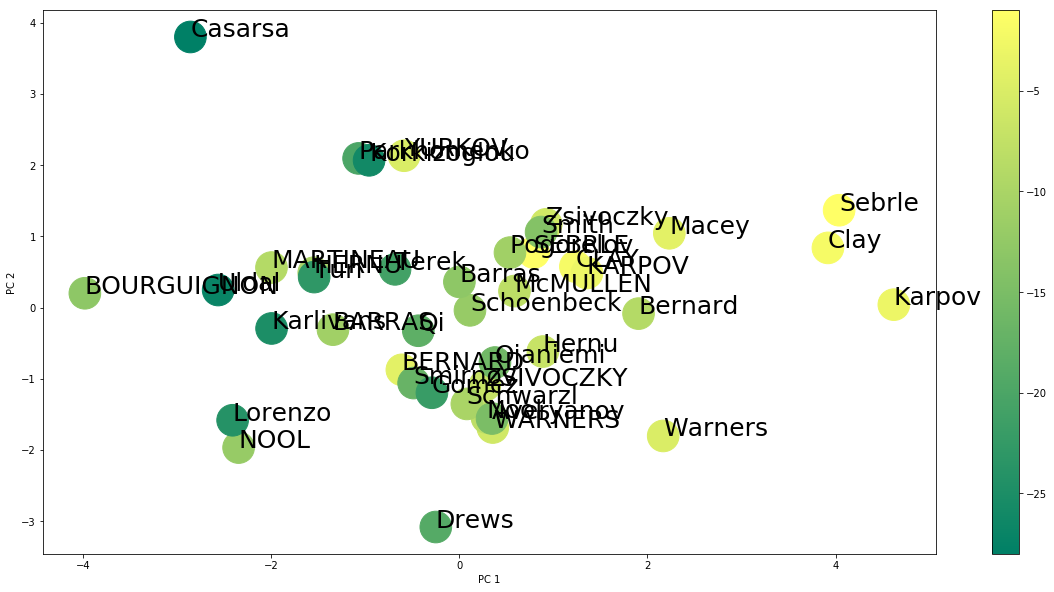

In [9]:
import matplotlib.pyplot as plt
plt.set_cmap('summer')
color = data.get("Rank")
color *= (-1)
fig = plt.figure(figsize=(20,10))
plt.scatter(X_projected[:,0],X_projected[:,1],c=color, s=1000)
for i, (x,y) in enumerate(zip(X_projected[:,0],
                             X_projected[:,1])):
    plt.text(x,y, data.index[i], fontsize=25)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

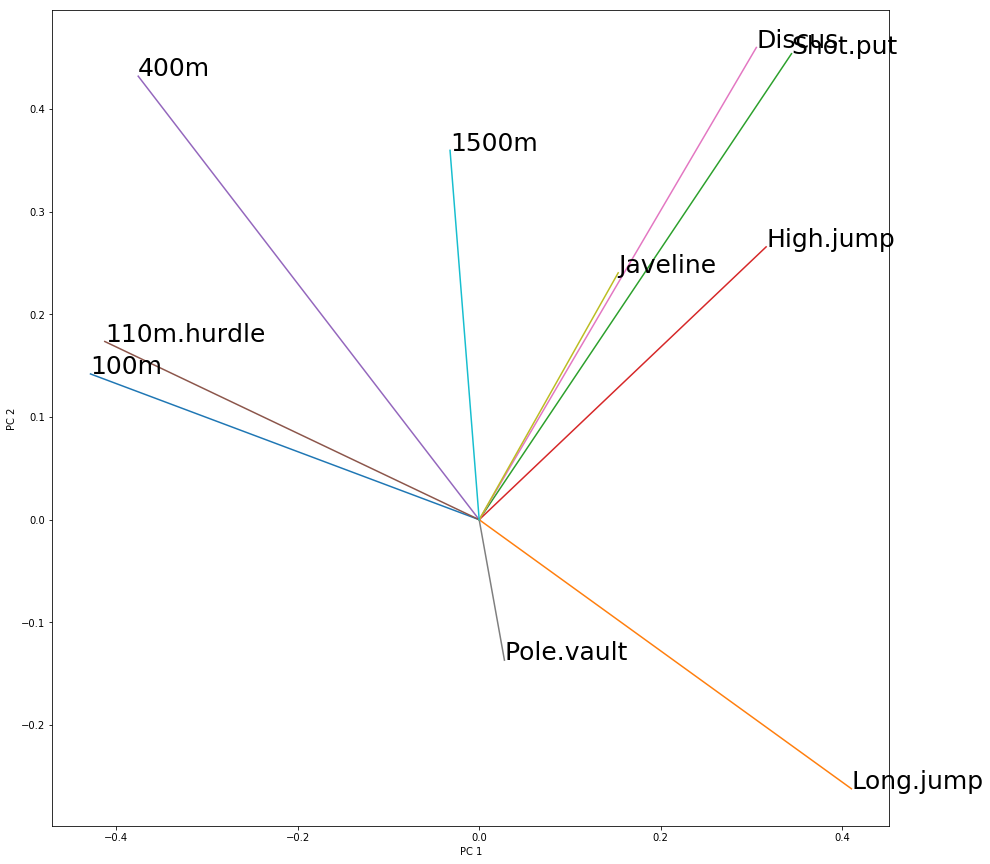

In [10]:
#Structure de composition
pcs = pca.components_
figure = plt.figure(figsize=(15,15))
for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    plt.plot([0,x],[0,y])
    plt.text(x,y,data.columns[i],fontsize=25)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.show()

3D ?

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[ 0.32719055  0.1737131   0.14049167]


In [13]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.32719055  0.50090366  0.64139532]


In [15]:
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

(41, 3)


Visualisation

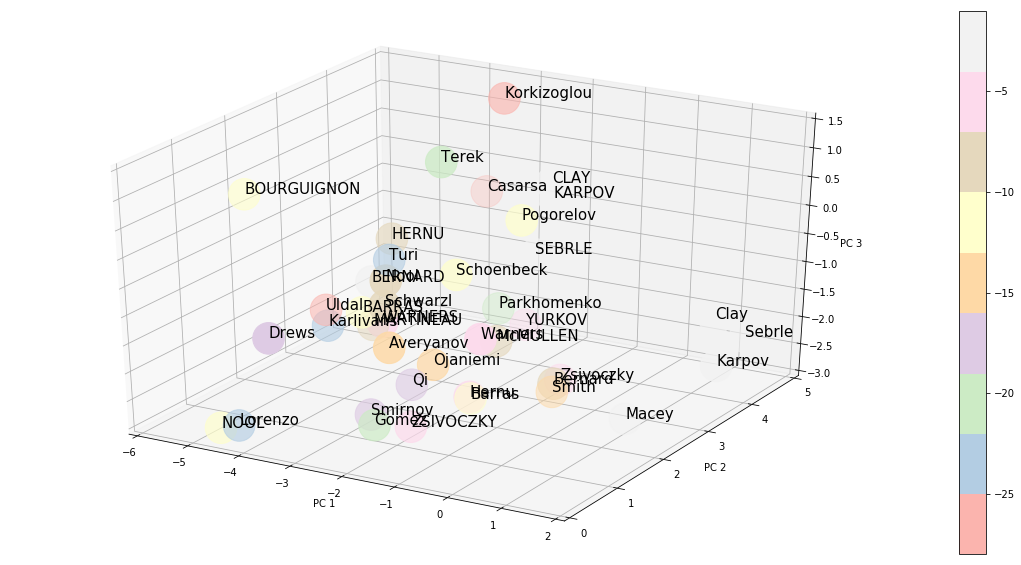

In [16]:
from mpl_toolkits.mplot3d import Axes3D
plt.set_cmap('Pastel1')
coulour = data.get("Rank")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
size = X_projected[:,0]**0+1000
p=ax.scatter(X_projected[:,0],X_projected[:,1], X_projected[:,2], c=coulour, s=size)

for i, (x,y,z) in enumerate(zip(X_projected[:,0],
                             X_projected[:,1],
                               X_projected[:,2])):
    ax.text(x,y,z, data.index[i],color='k',fontsize=15)
    
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_xlim([-6, 2])
ax.set_ylim([0, 5])
ax.set_zlim([-3, 1.5])
fig.colorbar(p)

plt.show()

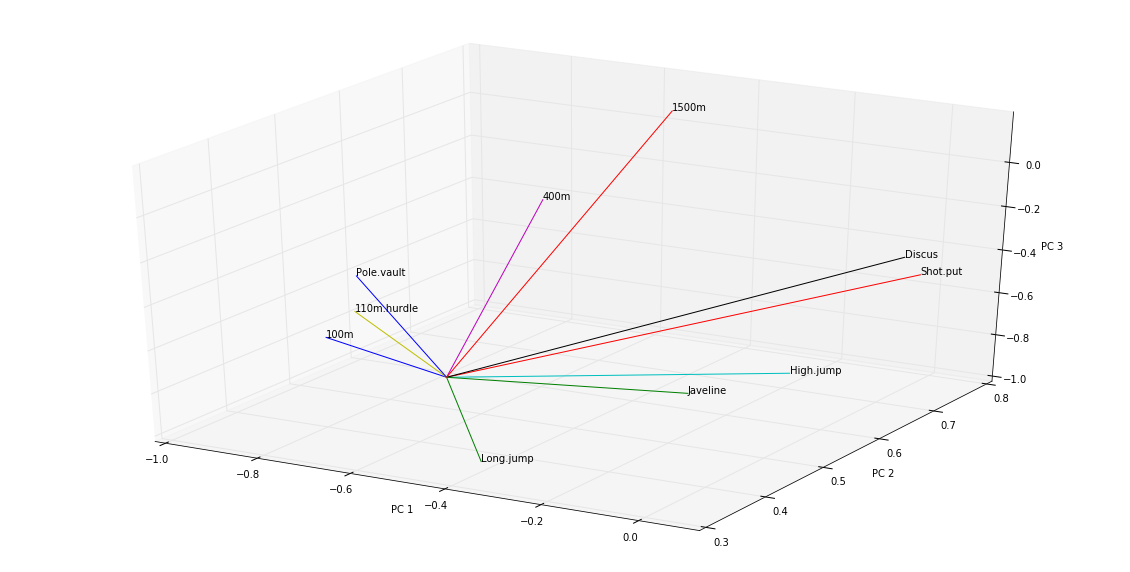

In [12]:
#Structure de composition
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
1

pcs = pca.components_

for i, (x,y,z) in enumerate(zip(pcs[0,:],pcs[1,:], pcs[2,:])):
    ax.plot([0,x],[0,y],[0,z])
    ax.text(x,y,z,data.columns[i])
    
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_xlim([-1,0.1])
ax.set_ylim([0.3,.8])
ax.set_zlim([-1,0.2])


plt.show()